# Train a gesture recognition model for microcontroller (ESP32) use

This notebook demonstrates how to train a 20kb gesture recognition model for [TensorFlow Lite for Microcontrollers](https://tensorflow.org/lite/microcontrollers/overview). It will produce the same model used in the [magic_wand_esp32_mpu6050](https://github.com/stefan/MagicWand-TFLite-ESP32-MPU6050/blob/main/magic_wand_esp32_mpu6050) application.

The model is designed to be used with [Google Colaboratory](https://colab.research.google.com).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/stefan-spiss/MagicWand-TFLite-ESP32-MPU6050/blob/main/train/train_magic_wand_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/stefan-spiss/MagicWand-TFLite-ESP32-MPU6050/blob/main/train/train_magic_wand_model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>


Training is much faster using GPU acceleration. Before you proceed, ensure you are using a GPU runtime by going to **Runtime -> Change runtime type** and selecting **GPU**. Training will take around 5 minutes on a GPU runtime.

## Configure dependencies

Run the following cell to ensure the correct version of TensorFlow is used.

We'll also clone the TensorFlow repository, which contains the training scripts, and copy them into our workspace.

In [ ]:
# Clone the repository from GitHub
# !git clone --depth 1 -q https://github.com/stefan-spiss/MagicWand-TFLite-ESP32-MPU6050.git
# Copy the training scripts into our workspace
# !cp -r MagicWand-TFLite-ESP32-MPU6050/train train

## Prepare the data

Next, we'll extract the data into the expected location within the training scripts' directory.

In [ ]:
# Extract the data into the train directory
# !unzip  MagicWand-TFLite-ESP32-MPU6050/data/data.zip -d train
#!tar xvzf data.tar.gz -C train 1>/dev/null

We now inspect the data by plotting it.  

In [1]:
# The scripts must be run from within the train directory
# %cd train
# Plot the data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import math

from data_prepare import prepare_original_data
from data_prepare import generate_negative_data


In [2]:
LABEL_NAME = "gesture"
DATA_NAME = "accel_ms2_xyz"
folders = ["wing", "ring", "slope"]
names = [
    "stefan",
    "patrick",
    "justin",
    "yeongmi"
    "arthur",
    "kai",
    "nico",
    "filip",
    "lukas",
    "peter",
]


In [3]:
data = []
folder = "wing"
name = "stefan"
filename = "./data/%s/output_%s_%s.txt" % (folder,folder,name)
print("Filename: ",filename)

Filename:  ./data/wing/output_wing_stefan.txt


Create one entry of the data list

In [4]:
new_data = []
prepare_original_data(folder,name,new_data,filename)

In [5]:
print("Type of data entry: ",type(new_data), "no of gestures: ",len(new_data))
print(new_data)

Type of data entry:  <class 'list'> no of gestures:  25
[{'gesture': 'wing', 'accel_ms2_xyz': [[-1.47, 8.44, 1.33], [-0.94, 8.04, 1.41], [-0.29, 9.97, 1.93], [-1.58, 8.37, 1.73], [-1.85, 10.41, 1.76], [0.17, 11.01, 2.0], [-0.66, 12.05, 1.9], [0.1, 9.06, 1.75], [-1.96, 4.44, 0.63], [-3.25, 3.14, 0.61], [-2.46, 3.33, 0.26], [-5.67, 1.16, -1.47], [-4.43, 4.68, -3.4], [-1.87, 8.2, -2.8], [-2.97, 17.06, -2.2], [-3.49, 20.18, -2.56], [-5.61, 20.5, -4.17], [0.18, 18.33, -3.75], [2.4, 16.37, -2.61], [-0.45, 6.69, -3.24], [3.97, 10.31, 0.31], [-2.04, -2.56, -1.79], [-4.09, 0.84, 0.46], [2.67, 2.39, 1.76], [-0.89, 0.05, 0.36], [-3.07, 7.3, -1.12], [1.1, 5.92, -0.78], [-0.94, 9.52, -1.75], [-3.44, 15.27, -1.18], [-4.44, 11.23, -2.7], [-3.0, 22.31, -1.45], [-0.92, 12.56, -3.29], [-0.17, 20.25, -1.95], [4.87, 18.23, -4.77], [-2.79, 12.08, -1.62], [4.7, 7.45, -2.94], [-1.78, -4.25, 0.01], [1.92, 0.91, 1.72], [4.1, 5.4, 2.77], [0.86, 5.08, 2.56], [-0.1, 6.6, 2.47], [1.8, 8.88, 3.31], [0.33, 8.66, 3.2

In [6]:
data = []  # pylint: disable=redefined-outer-name
for idx1, folder in enumerate(folders):
  for idx2, name in enumerate(names):
    prepare_original_data(folder, name, data,
                          "./data/%s/output_%s_%s.txt" % (folder, folder, name))
n_gestures = len(data)
for idx, name in enumerate(names):
  prepare_original_data("negative", name, data,
                        "./data/negative/output_negative_%s.txt" % (name))
n_negative = len(data) - n_gestures
folders.append("negative")

In [7]:
print("Total number of gestures: ",len(data))
print("This is how a gesture looks like:")
print(data[0])

Total number of gestures:  404
This is how a gesture looks like:
{'gesture': 'wing', 'accel_ms2_xyz': [[-1.47, 8.44, 1.33], [-0.94, 8.04, 1.41], [-0.29, 9.97, 1.93], [-1.58, 8.37, 1.73], [-1.85, 10.41, 1.76], [0.17, 11.01, 2.0], [-0.66, 12.05, 1.9], [0.1, 9.06, 1.75], [-1.96, 4.44, 0.63], [-3.25, 3.14, 0.61], [-2.46, 3.33, 0.26], [-5.67, 1.16, -1.47], [-4.43, 4.68, -3.4], [-1.87, 8.2, -2.8], [-2.97, 17.06, -2.2], [-3.49, 20.18, -2.56], [-5.61, 20.5, -4.17], [0.18, 18.33, -3.75], [2.4, 16.37, -2.61], [-0.45, 6.69, -3.24], [3.97, 10.31, 0.31], [-2.04, -2.56, -1.79], [-4.09, 0.84, 0.46], [2.67, 2.39, 1.76], [-0.89, 0.05, 0.36], [-3.07, 7.3, -1.12], [1.1, 5.92, -0.78], [-0.94, 9.52, -1.75], [-3.44, 15.27, -1.18], [-4.44, 11.23, -2.7], [-3.0, 22.31, -1.45], [-0.92, 12.56, -3.29], [-0.17, 20.25, -1.95], [4.87, 18.23, -4.77], [-2.79, 12.08, -1.62], [4.7, 7.45, -2.94], [-1.78, -4.25, 0.01], [1.92, 0.91, 1.72], [4.1, 5.4, 2.77], [0.86, 5.08, 2.56], [-0.1, 6.6, 2.47], [1.8, 8.88, 3.31], [0.33, 8

In [8]:
no_of_wings = 0
no_of_rings = 0
no_of_slopes = 0
no_of_negatives = 0
for i in range(len(data)):
    if data[i]["gesture"] == "wing":
        no_of_wings += 1
    elif data[i]["gesture"] == "ring":
        no_of_rings += 1
    elif data[i]["gesture"] == "slope":
        no_of_slopes += 1
    elif data[i]["gesture"] == "negative":
        no_of_negatives += 1
print("No of wings: ",no_of_wings, ", no of rings: ",no_of_rings,", no of slopes: ",no_of_slopes,", no of negatives: ",no_of_negatives)

No of wings:  93 , no of rings:  121 , no of slopes:  121 , no of negatives:  69


In [9]:
# if there are more than 10% more gesture samples per gesture as negative samples, generate additional negative
# samples
if n_gestures - n_negative * len(folders) > n_gestures/len(folders) * 0.1:
  print("not enough negative samples available, creating random data samples")
  generate_negative_data(data, (math.ceil(n_gestures/len(folders)) - n_negative))
n_negative = len(data) - n_gestures

columns = [LABEL_NAME, "name", DATA_NAME]
df = pd.DataFrame(data, columns=columns)
  
df_gesture_data = pd.DataFrame()
for folder in folders:
  for row in df.loc[df[LABEL_NAME] == folder].iterrows():
    tmp_data = np.array(row[1][DATA_NAME])
    df_tmp = pd.DataFrame({
      "name": np.full(len(tmp_data), row[1]["name"]), 
      LABEL_NAME: np.full(len(tmp_data), folder),
      "t": range(len(tmp_data)),
      "X": tmp_data[:, 0],
      "Y": tmp_data[:, 1],
      "Z": tmp_data[:, 2]
      })
    df_gesture_data = pd.concat([df_gesture_data, df_tmp], ignore_index=True)


not enough negative samples available, creating random data samples


PLot an accelerometer data example for each of the gestures

In [15]:
wing_index     = 0
ring_index     = 0
slope_index    = 0
negative_index = 0
gesture_indices = []
while data[wing_index]["gesture"] != "wing":
    wing_index += 1
while data[ring_index]["gesture"] != "ring":
    ring_index += 1
while data[slope_index]["gesture"] != "slope":
    slope_index += 1
while data[negative_index]["gesture"] != "negative":
    negative_index += 1
gesture_indices.append(wing_index)
gesture_indices.append(ring_index)
gesture_indices.append(slope_index)
gesture_indices.append(negative_index)

print("Indices of first wing, ring, slope,negative dataset: {:d}, {:d}, {:d}, {:d}".format(wing_index,
                                                                                           ring_index,
                                                                                           slope_index,
                                                                                           negative_index))
print(len(gesture_indices))

Indices of first wing, ring, slope,negative dataset: 0, 93, 214, 335
4


Plot the gestures

In [36]:
gesture_data = []
for i in range(len(gesture_indices)):
    no_of_values = len(data[gesture_indices[i]]["accel_ms2_xyz"])
    print("No of values in accelerometer data array: ",no_of_values)
    acc = (np.array(data[gesture_indices[i]]["accel_ms2_xyz"])[:,0], 
           np.array(data[gesture_indices[i]]["accel_ms2_xyz"])[:,1], 
           np.array(data[gesture_indices[i]]["accel_ms2_xyz"])[:,2])
    gesture_data.append(acc)

No of values in accelerometer data array:  55
No of values in accelerometer data array:  50
No of values in accelerometer data array:  38
No of values in accelerometer data array:  44


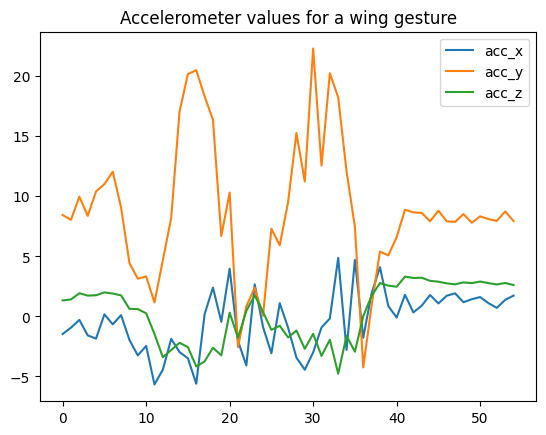

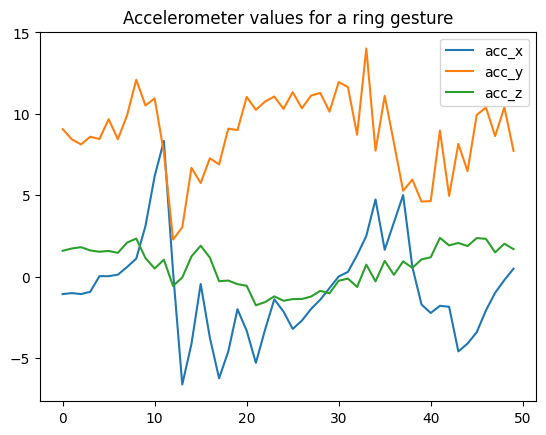

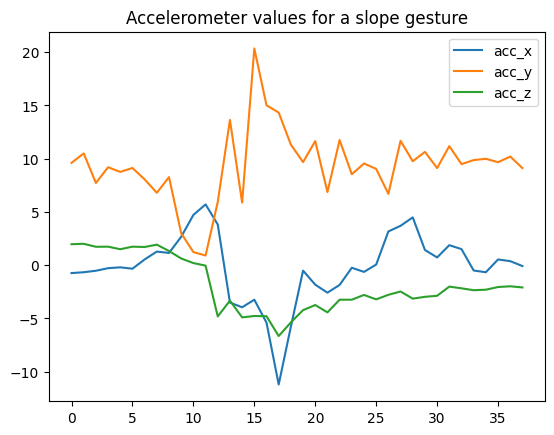

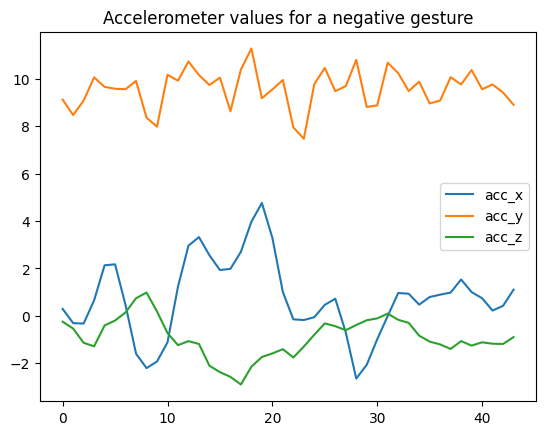

In [37]:
for i in range(len(gesture_indices)):
    plt.title("Accelerometer values for a {:s} gesture".format(data[gesture_indices[i]]["gesture"]))
    plt.plot(gesture_data[i][0],label="acc_x")
    plt.plot(gesture_data[i][1],label="acc_y")
    plt.plot(gesture_data[i][2],label="acc_z")
    plt.legend()
    plt.show()

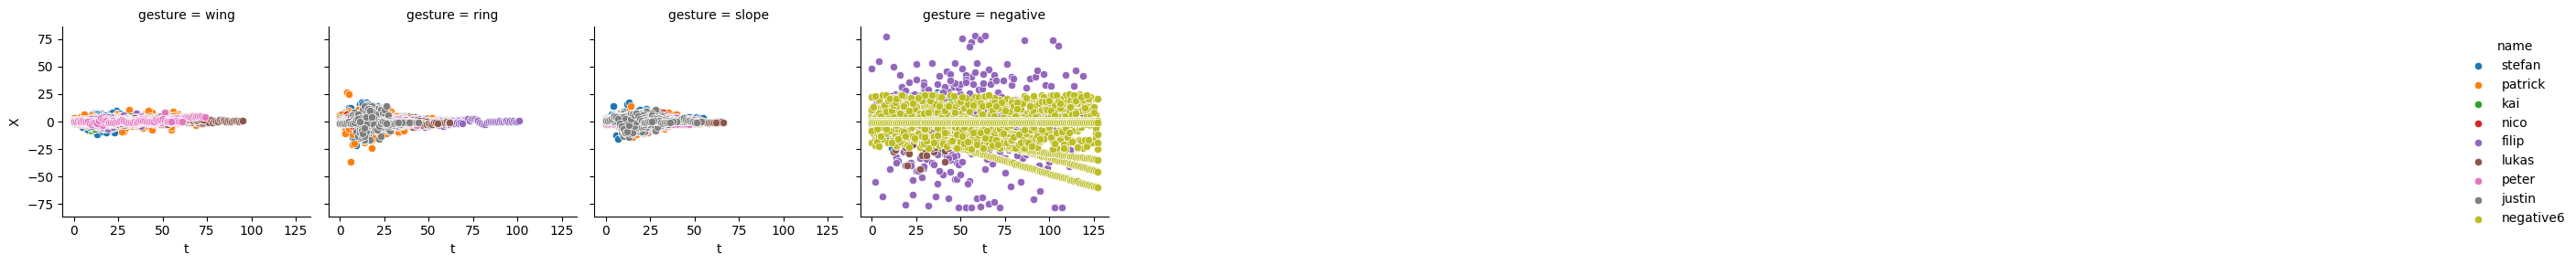

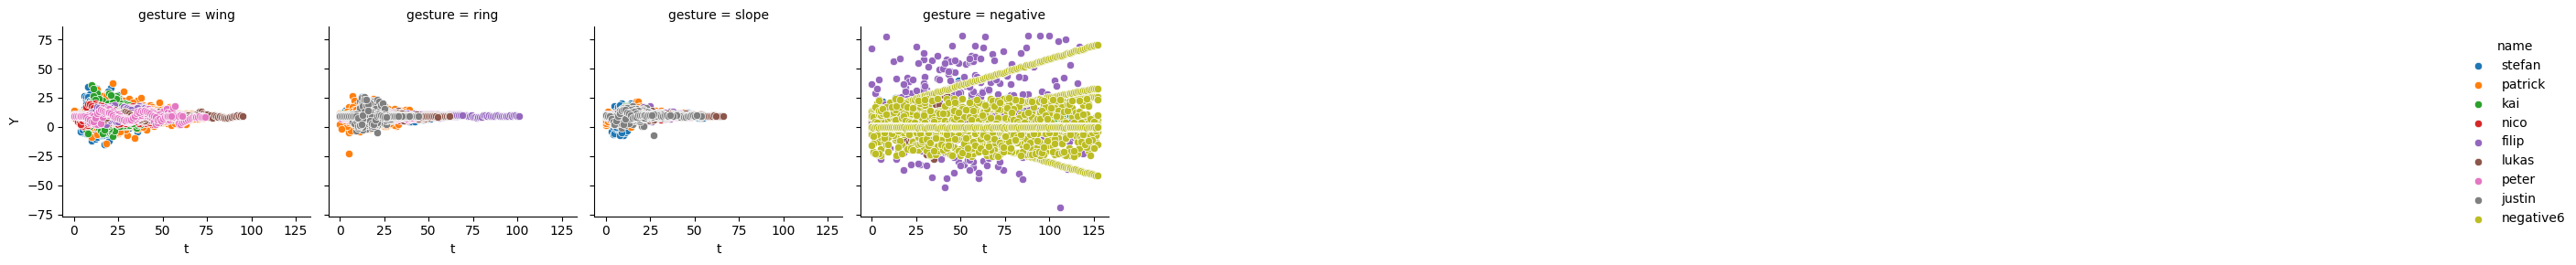

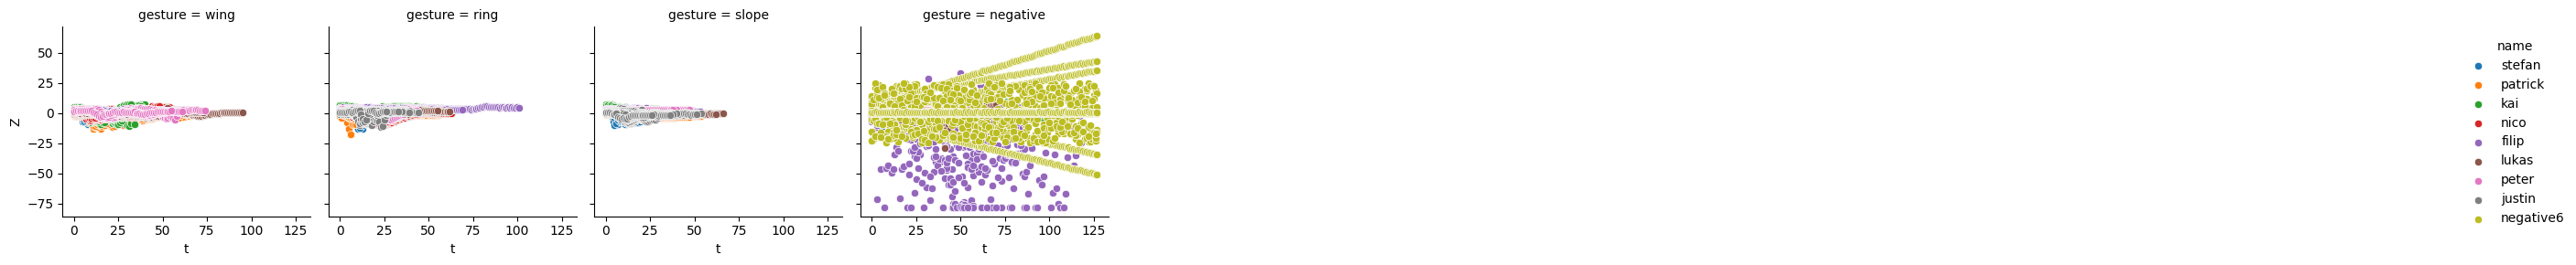

In [38]:
grid_X = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_X.map(sb.scatterplot, "t", "X")
grid_X.add_legend()
grid_Y = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_Y.map(sb.scatterplot, "t", "Y")
grid_Y.add_legend()
grid_Z = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_Z.map(sb.scatterplot, "t", "Z")
grid_Z.add_legend()

plt.show()

We'll then run the scripts that split the data into training, validation, and test sets.

In [ ]:
def prepare_original_data(folder, name, data, file_to_read):  # pylint: disable=redefined-outer-name
  """Read collected data from files."""
  if os.path.isfile(file_to_read):
    with open(file_to_read, "r") as f:
      lines = csv.reader(f)
      data_new = {}
      data_new[LABEL_NAME] = folder
      data_new[DATA_NAME] = []
      data_new["name"] = name
      for idx, line in enumerate(lines):  # pylint: disable=unused-variable,redefined-outer-name
        if len(line) == 3:
          if line[2] == "-" and data_new[DATA_NAME] or (folder == "negative" and len(data_new[DATA_NAME]) == 120):
            data.append(data_new)
            data_new = {}
            data_new[LABEL_NAME] = folder
            data_new[DATA_NAME] = []
            data_new["name"] = name
          elif line[2] != "-":
            data_new[DATA_NAME].append([float(i) for i in line[0:3]])
      data.append(data_new)


In [60]:
def generate_negative_data(data, number_samples):  # pylint: disable=redefined-outer-name
  """Generate negative data labeled as 'negative6~8'."""
  # Big movement -> around straight line
  for i in range(number_samples//3):
    if i > 80:
      dic = {LABEL_NAME: "negative", DATA_NAME: [], "name": "negative8"}
    elif i > 60:
      dic = {LABEL_NAME: "negative", DATA_NAME: [], "name": "negative7"}
    else:
      dic = {LABEL_NAME: "negative", DATA_NAME: [], "name": "negative6"}
    print("name in dictionary: ", dic["name"])
    start_x = (random.random() - 0.5) * 30
    start_y = (random.random() - 0.5) * 30
    start_z = (random.random() - 0.5) * 30
    x_increase = (random.random() - 0.5)
    y_increase = (random.random() - 0.5)
    z_increase = (random.random() - 0.5)
    for j in range(128):
      dic[DATA_NAME].append([
          start_x + j * x_increase + (random.random() - 0.5) * 0.6,
          start_y + j * y_increase + (random.random() - 0.5) * 0.6,
          start_z + j * z_increase + (random.random() - 0.5) * 0.6
      ])
    data.append(dic)
  # Random
  for i in range(number_samples//3):
    if i > 80:
      dic = {DATA_NAME: [], LABEL_NAME: "negative", "name": "negative8"}
    elif i > 60:
      dic = {DATA_NAME: [], LABEL_NAME: "negative", "name": "negative7"}
    else:
      dic = {DATA_NAME: [], LABEL_NAME: "negative", "name": "negative6"}
    for j in range(128):
      dic[DATA_NAME].append([(random.random() - 0.5) * 50,
                             (random.random() - 0.5) * 50,
                             (random.random() - 0.5) * 50])
    data.append(dic)
  # Stay still
  for i in range(number_samples//3):
    if i > 80:
      dic = {DATA_NAME: [], LABEL_NAME: "negative", "name": "negative8"}
    elif i > 60:
      dic = {DATA_NAME: [], LABEL_NAME: "negative", "name": "negative7"}
    else:
      dic = {DATA_NAME: [], LABEL_NAME: "negative", "name": "negative6"}
    start_x = (random.random() - 0.5) * 2
    start_y = (random.random() - 0.5) * 2
    start_z = (random.random() - 0.5) * 2
    for j in range(128):
      dic[DATA_NAME].append([
          start_x + (random.random() - 0.5) * 0.4,
          start_y + (random.random() - 0.5) * 0.4,
          start_z + (random.random() - 0.5) * 0.4
      ])
    data.append(dic)


In [46]:
# Write data to file

def write_data(data_to_write, path):
  with open(path, "w") as f:
    for idx, item in enumerate(data_to_write):  # pylint: disable=unused-variable,redefined-outer-name
      dic = json.dumps(item, ensure_ascii=False)
      f.write(dic)
      f.write("\n")


In [44]:
for i,name in enumerate(folders):
    print("Index: {:d}, name: {:s}".format(i,name))

Index: 0, name: wing
Index: 1, name: ring
Index: 2, name: slope
Index: 3, name: negative


In [61]:
import csv
import json
import random
data = []  # pylint: disable=redefined-outer-name
for idx1, folder in enumerate(folders):
    for idx2, name in enumerate(names):
        prepare_original_data(folder, name, data,
                            "./data/%s/output_%s_%s.txt" % (folder, folder, name))
n_negative = len(data) - n_gestures       
print("n_gestures: {:d}, data length: {:d}".format(n_gestures,len(data)))
# if there are more than 10% more gesture samples per gesture as negative samples, generate additional negative
# samples
if n_gestures - n_negative * len(folders) > n_gestures/len(folders) * 0.1:
    print("not enough negative samples available, creating random data samples")
    print("number of negatives: {:d}".format(math.ceil(n_gestures/len(folders)) - n_negative))
    generate_negative_data(data, (math.ceil(n_gestures/len(folders)) - n_negative))
    n_negative = len(data) - n_gestures

print("gesture_data_length: " + str(n_gestures))
print("negative_data_length: " + str(n_negative))
print("data_length: " + str(len(data)))    
write_data(data,"/tmp/complete_data")

n_gestures: 335, data length: 404
not enough negative samples available, creating random data samples
number of negatives: 15
name in dictionary:  negative6
name in dictionary:  negative6
name in dictionary:  negative6
name in dictionary:  negative6
name in dictionary:  negative6
gesture_data_length: 335
negative_data_length: 84
data_length: 419


In [62]:
# Prepare the data
!python data_prepare.py
# Split the data by person
#!python data_split_person.py
# Split the data randomly since only one person available
!python data_split.py

not enough negative samples available, creating random data samples
gesture_data_length: 429
negative_data_length: 142
data_length: 571
data_length:571
{'wing': 127, 'ring': 151, 'slope': 151, 'negative': 142}
train_length:341
test_length:117


## Load TensorBoard

Now, we set up TensorBoard so that we can graph our accuracy and loss as training proceeds.

In [ ]:
# Load TensorBoard
%load_ext tensorboard
%tensorboard --logdir logs/scalars

## Begin training

The following cell will begin the training process. Training will take around 5 minutes on a GPU runtime. You'll see the metrics in TensorBoard after a few epochs.

In [63]:
#!python train.py --model CNN --person true
!python train.py --model CNN

2025-12-21 15:13:55.562493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766326435.830032   21756 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766326435.891723   21756 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-21 15:13:56.391469: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Start to load data...
train_data_length:8523
valid_data_length:113
test_data_length:117
W0000 00:00:1766326443.424825   21756

## Create a C source file

The `train.py` script writes a model, `model.tflite`, to the training scripts' directory.

In the following cell, we convert this model into a C++ source file we can use with TensorFlow Lite for Microcontrollers.

In [ ]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i model.tflite > /content/model.cc
# Print the source file
!cat /content/model.cc